In [62]:
library(class)
library(dplyr)

In [63]:
Data <- read.csv("/Users/Amardeep/Documents/Semester_2/Dic/lab_3/June_10-July_12_CSV.csv")
summary(Data)
head(Data$age)

     psraid           sample        int_date          lang       usr    
 Min.   :100006   Min.   :1.00   Min.   :61015   Min.   :1.000   R:375  
 1st Qu.:102765   1st Qu.:1.00   1st Qu.:62115   1st Qu.:1.000   S:971  
 Median :201182   Median :2.00   Median :62415   Median :1.000   U:655  
 Mean   :167354   Mean   :1.65   Mean   :63683   Mean   :1.051          
 3rd Qu.:203261   3rd Qu.:2.00   3rd Qu.:62915   3rd Qu.:1.000          
 Max.   :205508   Max.   :2.00   Max.   :71215   Max.   :2.000          
                                                                        
    cregion          state            form            sex       
 Min.   :1.000   Min.   : 1.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:13.00   1st Qu.:1.000   1st Qu.:1.000  
 Median :3.000   Median :29.00   Median :2.000   Median :2.000  
 Mean   :2.667   Mean   :28.82   Mean   :1.515   Mean   :1.506  
 3rd Qu.:3.000   3rd Qu.:42.00   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :4.000   Max.   :5

[1] 47 63 86 40 65 69

Change the URL of the csv.

In [64]:
final_1 <- subset(Data, emplnw<8 & game1<3 & age < 98 & marital < 8 , select = c(sex, age, game1, marital, emplnw))
head(final_1)

,sex,age,game1,marital,emplnw
1,2,47,2,1,4
2,2,63,1,1,3
4,2,40,2,1,1
6,2,69,2,1,2
7,1,72,2,1,3
8,1,70,2,1,3


Selecting Sex, Age, Game1, Marital status and employment status from the dataset, only selecting values which are useful to us.

In [65]:
final <- na.omit(final_1)
head(final)

,sex,age,game1,marital,emplnw
1,2,47,2,1,4
2,2,63,1,1,3
4,2,40,2,1,1
6,2,69,2,1,2
7,1,72,2,1,3
8,1,70,2,1,3


In [66]:
final <- final %>% mutate(marital_final = ifelse(marital<3, 1, 2)) #1 is reltionship and 2 is single
summary(final$marital_final)
final <- final %>% mutate(empl_final = ifelse(emplnw == 1 | emplnw == 2 | emplnw == 5, 1,2))
# 1 is employed and 2 is unemployed
summary(final$empl_final)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.409   2.000   2.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.443   2.000   2.000 

Converting all the fields except age to Binary for easy inferences.

In [67]:
final_final <- subset(final, select = c(sex, age, game1, marital_final, empl_final))
head(final_final)

sex,age,game1,marital_final,empl_final
2,47,2,1,2
2,63,1,1,2
2,40,2,1,1
2,69,2,1,1
1,72,2,1,2
1,70,2,1,2


In [68]:
km <- kmeans(final_final, centers = 3, iter.max = 100, algorithm = "Hartigan-Wong" )
km

K-means clustering with 3 clusters of sizes 718, 556, 645

Cluster means:
       sex      age    game1 marital_final empl_final
1 1.551532 69.83983 1.697772      1.380223   1.771588
2 1.442446 27.79496 1.357914      1.552158   1.233813
3 1.505426 50.02171 1.505426      1.316279   1.258915

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   3    1    3    1    1    1    1    1    1    1    3    1    3    3    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    3    2    1    1    3    1    2    3    1    1    1    1    3    2    2 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   3    3    1    1    3    3    1    1    1    2    1    2    1    1    3    1 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   3    1    1    1    2    3    1    1    3    1    1    1    3    1    1    1 
  65   66   67   68   69   70   71   72   

In [69]:
km$centers

,sex,age,game1,marital_final,empl_final
1,1.551532,69.83983,1.697772,1.380223,1.771588
2,1.442446,27.79496,1.357914,1.552158,1.233813
3,1.505426,50.02171,1.505426,1.316279,1.258915


## Inferences from K=3

From the clusters formed we can easily infer some information, these information are presented in points below.

1) We can observe from the first cluster that sex is 1.55 which is closer to 2(female) and game1 is also 1.69 which is closer to 2(do not play games). From this we can infer that in the dataset women who didn't play games were greater than women who played games.

2) we can observe from the second cluster that sex is 1.44 which is closer to 1(male) and game is also 1.35 which is closer to 1(play games). From this we can infer that in the dataset men who played games were more than men who did not play games.

3) From the first cluster the age is around 70 and the employment is closer to 2(not employed) from which we can infer that older people were unemployed in the dataset.

4) From the second closer the age is around 27 and the employment is closer to 1 (employed) from which we can infer that younger people were employed. from cluster 3 we can also observe that people of age group 50 were also employed.

5) From cluster 2 we can observe that age = 27 and the relationship status is closer to 2(single). In cluster 1 we can observe that at age = 70 people were more likely to be in a relationship. In cluster 3 as well People were more likely to be in a relationship.

In [70]:
km_2 <- kmeans(final_final, centers = 5, iter.max = 100, algorithm = "Hartigan-Wong" )
km_2

K-means clustering with 5 clusters of sizes 522, 481, 354, 224, 338

Cluster means:
       sex      age    game1 marital_final empl_final
1 1.530651 65.05747 1.643678      1.340996   1.670498
2 1.507277 51.82121 1.532225      1.330561   1.276507
3 1.418079 24.07345 1.327684      1.689266   1.257062
4 1.602679 79.62946 1.799107      1.450893   1.955357
5 1.485207 37.33136 1.411243      1.301775   1.186391

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   2    1    5    1    1    1    4    4    4    4    2    4    5    5    1    4 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    2    5    4    4    2    1    5    5    4    4    1    1    2    3    3 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   2    2    4    1    2    2    1    4    4    3    1    3    4    4    2    4 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   5 

In [72]:
km_2$centers

,sex,age,game1,marital_final,empl_final
1,1.530651,65.05747,1.643678,1.340996,1.670498
2,1.507277,51.82121,1.532225,1.330561,1.276507
3,1.418079,24.07345,1.327684,1.689266,1.257062
4,1.602679,79.62946,1.799107,1.450893,1.955357
5,1.485207,37.33136,1.411243,1.301775,1.186391


## Inferences from K=5

We can easily observe that our observations that we made before with k=3 are still valid. From the following centers we can make some additional inferences.

1) From cluster 3, 4 and 5 we can observe that more males are likely to play games than females.

2) We can also observe that the tendency to play games linearly decreases as age increases.

3) We can also observe that the tendency to be in a relationship for a person increases with age, but we can observe a slight decline in this trend for people with ages 80 or so which could be attributed to death of the significant other due to old age.

4) It can we observed that the employment rates are high for 27 and increase and peak at age 37. After this the tendency to be employed decreses with age. Old people with ages 65 and 80 are most likely to be unemployed.

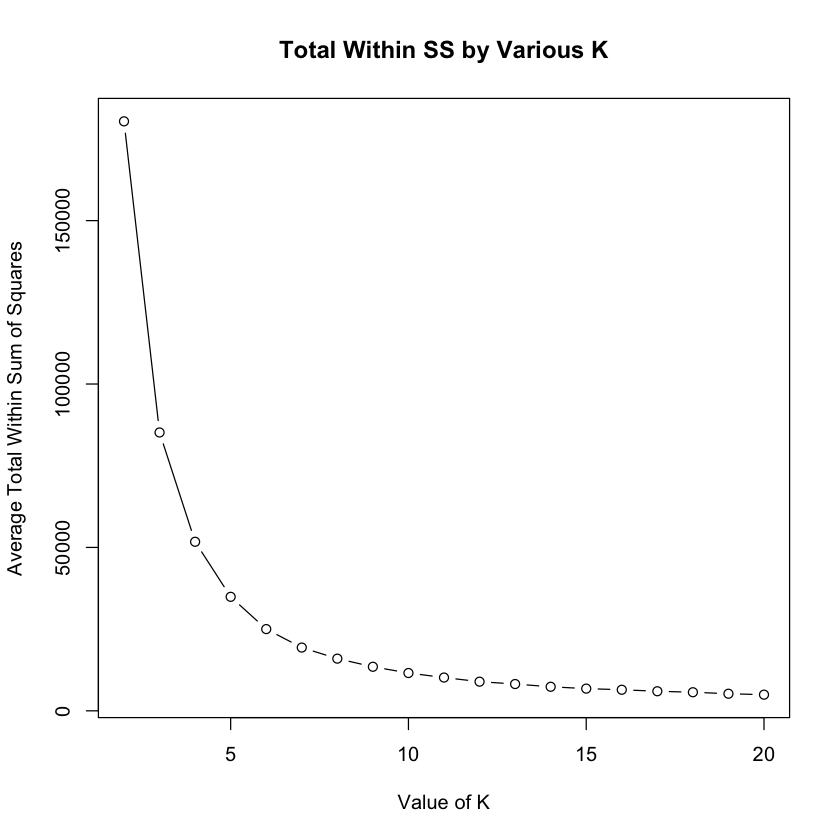

In [73]:
rng<-2:20 #K from 2 to 20
tries <-100 #Run the K Means algorithm 100 times
avg.totw.ss <-integer(length(rng)) #Set up an empty vector to hold all of points
for(v in rng){ # For each value of the range variable
 v.totw.ss <-integer(tries) #Set up an empty vector to hold the 100 tries
 for(i in 1:tries){
 k.temp <-kmeans(final_final ,centers=v) #Run kmeans
 v.totw.ss[i] <-k.temp$tot.withinss#Store the total withinss
 }
 avg.totw.ss[v-1] <-mean(v.totw.ss) #Average the 100 total withinss
}
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K",
 ylab="Average Total Within Sum of Squares",
 xlab="Value of K")